# Twitter Sentiment Analysis

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Dataset

In [2]:
dataset = pd.read_csv('Sentiment140.csv', encoding='ISO-8859-1')

In [3]:
dataset.shape

(1599999, 6)

In [5]:
print(dataset)

         0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  \
0        0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1        0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2        0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3        0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4        0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...     ..         ...                           ...       ...   
1599994  4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599995  4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996  4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997  4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998  4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

         _TheSpecialOne_  \
0          scotthamilton   
1               mattycus   
2                ElleCTF   
3                 Karoli   
4               joy_wolf   
...                  ...   
1599994  Am

In [3]:
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']
dataset = pd.read_csv('Sentiment140.csv', names = column_names,  encoding='ISO-8859-1')

In [10]:
dataset['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [9]:
dataset.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

# Data Preprocessing

### Converting 4 as 1 for easy identification

In [4]:
dataset.replace({'target':{4:1}}, inplace=True)

### Cleaning the texts ( Stemming )

In [5]:
import re 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer    

[nltk_data] Downloading package stopwords to C:\Users\Brian
[nltk_data]     Biju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def stemming(content):
    new_content = re.sub('[^a-zA-Z]', ' ', content)  
    new_content = new_content.lower() 
    new_content = new_content.split()
    
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_content = [ps.stem(word) for word in new_content if not word in set(all_stopwords)] 
    new_content = ' '.join(new_content)  
    
    return new_content

In [7]:
dataset['clean_text'] = dataset['text'].apply(stemming)

# Bag of Words Model

In [23]:
X = dataset['clean_text'].values
y = dataset['target'].values

# Splitting the dataset into the Training set and Test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(1600000,) (1280000,) (320000,)


# Textual to Numerical vectors

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X_train = tf.fit_transform(X_train)                         
X_test = tf.transform(X_test)                     

# Training the Machine Learning models 

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Model Evaluation

### Evaluation on Test data

In [12]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00


In [13]:
from sklearn.metrics import confusion_matrix , accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test , y_pred)
print(cm)    
accuracy_score(y_test , y_pred)

[[122248  37752]
 [ 32297 127703]]


0.781096875

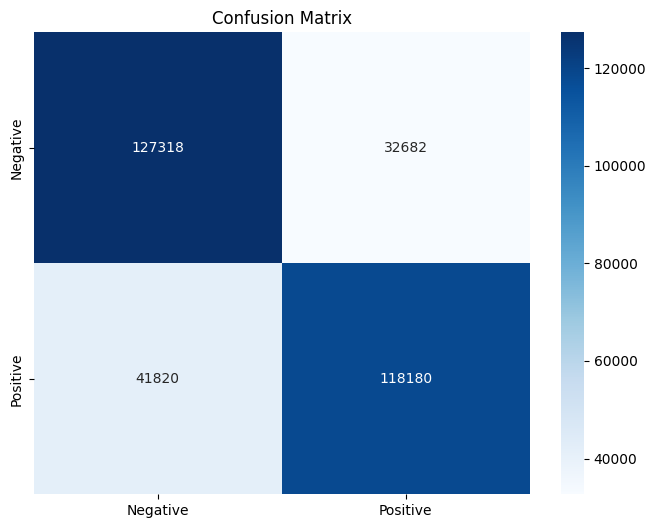

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['Negative', 'Positive']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.show()

# Naive Bayes

## Bag of words

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() 
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

### Training the model

In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

### Model Evaluation

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[127318  32682]
 [ 41820 118180]]


0.76718125

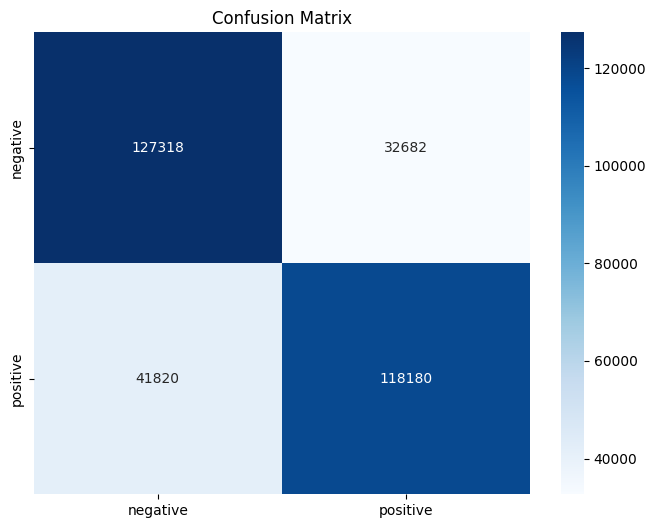

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['negative', 'positive']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.show()